# TP1: Développement d’un programme de régression linéaire.

## Etape 1 : Importer les librairies

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # We'll need this for Part 2

In [232]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split # For Part 2, but good to have
from sklearn.metrics import r2_score # For evaluating R2 score

## Etape 2 : Créer un Dataset

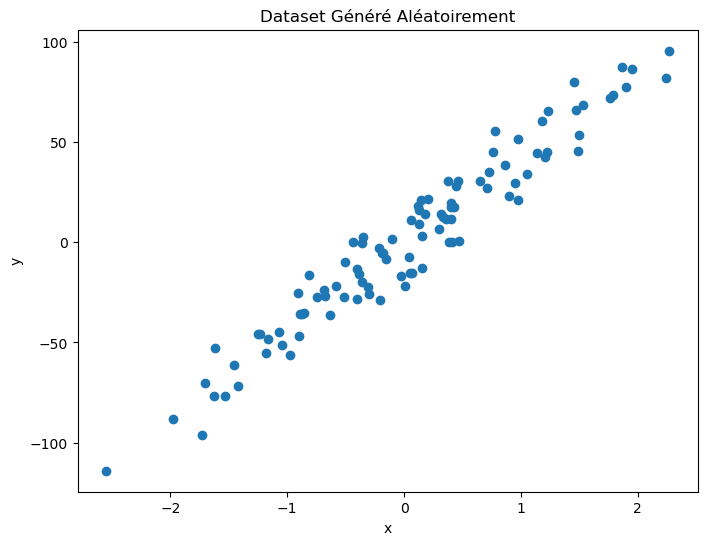

In [233]:
np.random.seed(0) # Pour la reproductibilité

x_generated, y_generated = make_regression(n_samples=100, n_features=1, noise=10)

plt.figure(figsize=(8, 6))
plt.scatter(x_generated, y_generated)
plt.title('Dataset Généré Aléatoirement')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Etape 3 : Développer le modèle et l’entraîner


In [234]:
model_sgd_bad = SGDRegressor(max_iter=100, eta0=0.0001) # Added random_state for consistency
model_sgd_bad.fit(x_generated, y_generated)

C:\Users\FERRA\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

In [235]:
y_pred_bad = model_sgd_bad.predict(x_generated)
r2_bad = model_sgd_bad.score(x_generated, y_generated) # or r2_score(y_generated, y_pred_bad)

print(f'Coeff R2 (mauvais modèle) = {r2_bad}')

Coeff R2 (mauvais modèle) = 0.22318690191350676


Coeff R2 (mauvais modèle) = 0.22318690191350676


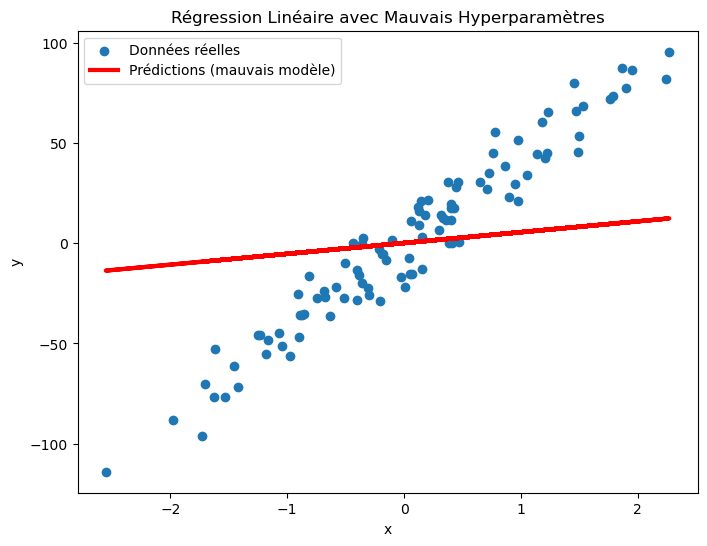

In [236]:
print(f'Coeff R2 (mauvais modèle) = {r2_bad}')
plt.figure(figsize=(8, 6))
plt.scatter(x_generated, y_generated, label='Données réelles')
plt.plot(x_generated, y_pred_bad, c='red', lw=3, label='Prédictions (mauvais modèle)')
plt.title('Régression Linéaire avec Mauvais Hyperparamètres')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Ce résultat montre que notre modèle semble vraiment mauvais. C’est parce que nous nel’avons pas entraîné suffisamment longtemps et parce que le Learning rate était trop faible.

### Deuxième entraînement (bons hyperparamètres)

In [269]:
model_sgd_bad = SGDRegressor(max_iter=10000, eta0=0.0001) # Added random_state for consistency
model_sgd_bad.fit(x_generated, y_generated)

SGDRegressor(eta0=0.0001, max_iter=10000)

In [270]:
y_pred_bad = model_sgd_bad.predict(x_generated)
r2_bad = model_sgd_bad.score(x_generated, y_generated) # or r2_score(y_generated, y_pred_bad)

print(f'Coeff R2 (mauvais modèle) = {r2_bad}')

Coeff R2 (mauvais modèle) = 0.9402564256602091


Coeff R2 (mauvais modèle) = 0.9402564256602091


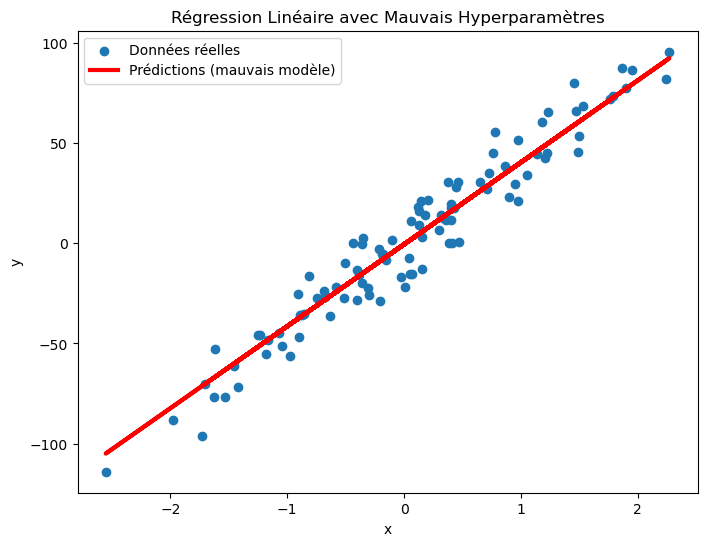

In [271]:
print(f'Coeff R2 (mauvais modèle) = {r2_bad}')
plt.figure(figsize=(8, 6))
plt.scatter(x_generated, y_generated, label='Données réelles')
plt.plot(x_generated, y_pred_bad, c='red', lw=3, label='Prédictions (mauvais modèle)')
plt.title('Régression Linéaire avec Mauvais Hyperparamètres')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Vous avez entraîné votre premier modèle de Machine Learning, et il fonctionne vraiment bien avec un coefficient 𝑅2 = 94%. Vous pourriez maintenant vous en servir pour faire de bonnes prédictions.

## VISUALISATION DES COURBES D'APPRENTISSAGE (MANUELLE)

### Importer les librairies

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [273]:
np.random.seed(4) # Nouveau seed comme dans le TP
m = 100 # Nombre d'échantillons
n_features_manual = 1 # Nombre de features (x)

In [274]:
x_manual, y_manual_orig = make_regression(n_samples=m, n_features=n_features_manual, noise=10, random_state=4)
y_manual = y_manual_orig + 100

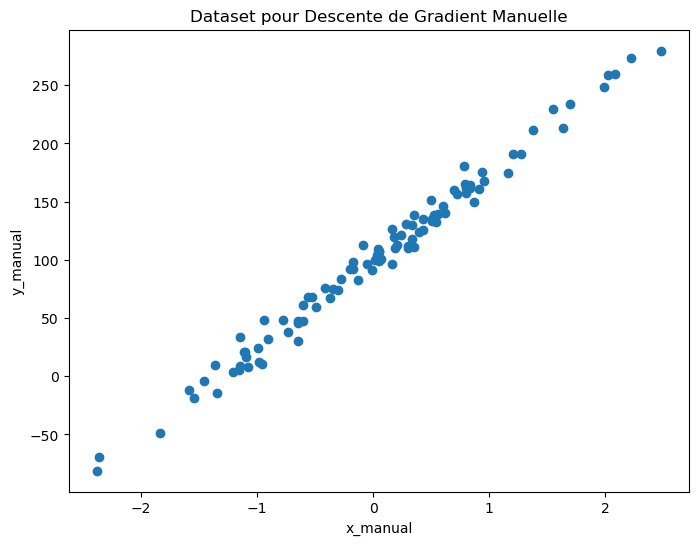

In [275]:
plt.figure(figsize=(8, 6))
plt.scatter(x_manual, y_manual)
plt.title('Dataset pour Descente de Gradient Manuelle')
plt.xlabel('x_manual')
plt.ylabel('y_manual')
plt.show()

In [276]:
y_manual = y_manual.reshape(y_manual.shape[0], 1)

In [277]:
X_manual_b = np.hstack((np.ones((m, 1)), x_manual))
print(f"Shape of X_manual_b (avec biais): {X_manual_b.shape}") # Doit être (100, 2)
print(f"Shape of y_manual: {y_manual.shape}") # Doit être (100, 1)

Shape of X_manual_b (avec biais): (100, 2)
Shape of y_manual: (100, 1)


#### Définir le modèle, la Fonction Coût et le Gradien

In [278]:
def model_func(X, theta):
    # X shape: (m, n+1)
    # theta shape: (n+1, 1)
    return X.dot(theta) # shape: (m, 1)

def cost_function(X, y, theta):
    m_samples = len(y)
    J = 1/(2*m_samples) * np.sum((model_func(X, theta) - y)**2)
    return J

def gradient(X, y, theta):
    m_samples = len(y)
    return 1/m_samples * X.T.dot(model_func(X, theta) - y)

#### Algorithme de Descente de Gradient

In [279]:
def gradient_descent(X, y, theta_init, learning_rate=0.0001, iterations=1000):
    m_samples = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta_init.shape[0])) # theta_init.shape[0] is n_features + 1

    theta = theta_init.copy() # Important to copy to avoid modifying the original theta_init

    for i in range(iterations):
        # prediction = model_func(X, theta) # Not strictly needed here if gradient calls model_func
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        theta_history[i,:] = theta.T # Store theta as a row

    return theta, cost_history, theta_history


#### Utilisation de l'algorithme et visualisation

In [280]:
np.random.seed(0) # Seed pour l'initialisation de theta
theta_initial = np.random.randn(X_manual_b.shape[1], 1) # (n_features+1, 1) -> (2,1)

iterations_manual = 10
learning_rate_manual = 0.3

theta_final, cost_history_manual, theta_history_manual = gradient_descent(
    X_manual_b, y_manual, theta_initial,
    learning_rate=learning_rate_manual,
    iterations=iterations_manual
)



Theta final (manuel): 
[[97.3404945 ]
 [73.23855447]]


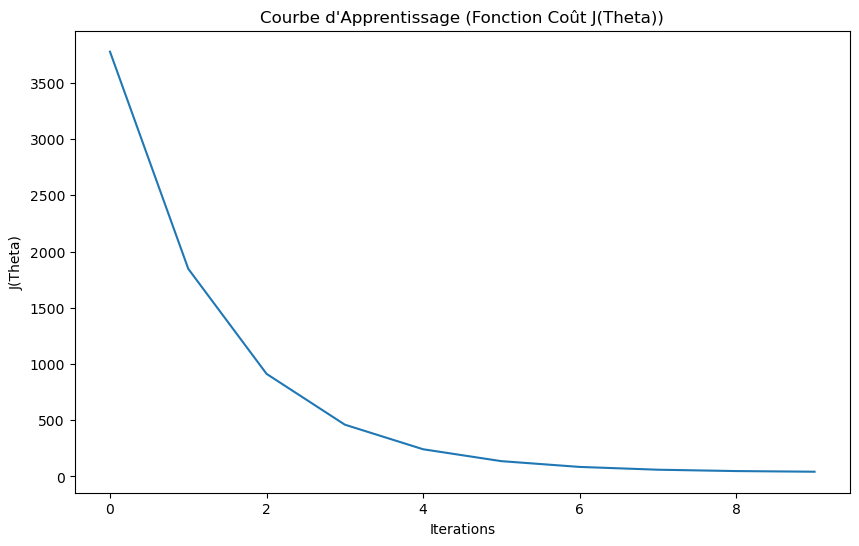

In [281]:
print(f"\nTheta final (manuel): \n{theta_final}")
plt.figure(figsize=(10, 6))
plt.plot(range(iterations_manual), cost_history_manual)
plt.title("Courbe d'Apprentissage (Fonction Coût J(Theta))")
plt.xlabel('Iterations')
plt.ylabel('J(Theta)')
plt.show()

## Partie 2 : Utilisation des données réelles importées depuis un fichier CSV

### INPORT  CSV


In [282]:
dataset = pd.read_csv('Data_salaire.csv')
print("\nDataset chargé:")
print(dataset.head())


Dataset chargé:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


### Séparation des entrées « features » des sorties « Target »

X_real: toutes les colonnes sauf la dernière
y_real: la dernière colonne

In [283]:
X_real = dataset.iloc[:, :-1].values  # Features (YearsExperience)
y_real = dataset.iloc[:, -1].values   # Target (Salary)

print(f"\nShape of X_real (features): {X_real.shape}")
print(f"Shape of y_real (target): {y_real.shape}")


Shape of X_real (features): (30, 1)
Shape of y_real (target): (30,)


### Répartition des données en entraînement et test

test_size=0.2 signifie 20% pour le test, 80% pour l'entraînement
random_state est pour la reproductibilité


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape of X_train: (24, 1), y_train: (24,)
Shape of X_test: (6, 1), y_test: (6,)


In [290]:
# Entraîner le modèle (SGDRegressor) sur les données d'entraînement
# On réutilise les "bons" hyperparamètres de la Partie 1
model_real_data = SGDRegressor(max_iter=10000, eta0=0.001, random_state=42) # Using a fixed random_state

In [291]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [292]:
print("\nEntraînement du modèle SGDRegressor sur les données réelles (X_train_scaled)...")
model_real_data.fit(X_train_scaled, y_train)


Entraînement du modèle SGDRegressor sur les données réelles (X_train_scaled)...


SGDRegressor(eta0=0.001, max_iter=10000, random_state=42)

In [293]:
y_pred_real_test_scaled = model_real_data.predict(X_test_scaled)

In [294]:
r2_real_test = model_real_data.score(X_test_scaled, y_test)

In [295]:
print(f"\nCoeff R2 sur les données de test (X_test_scaled) = {r2_real_test}")
print(f"Paramètres du modèle réel: Intercept = {model_real_data.intercept_}, Coeffs = {model_real_data.coef_}")


Coeff R2 sur les données de test (X_test_scaled) = 0.9022464416268707
Paramètres du modèle réel: Intercept = [74192.28334815], Coeffs = [27143.13936269]


### Visualisation des résultats sur l'ensemble de test

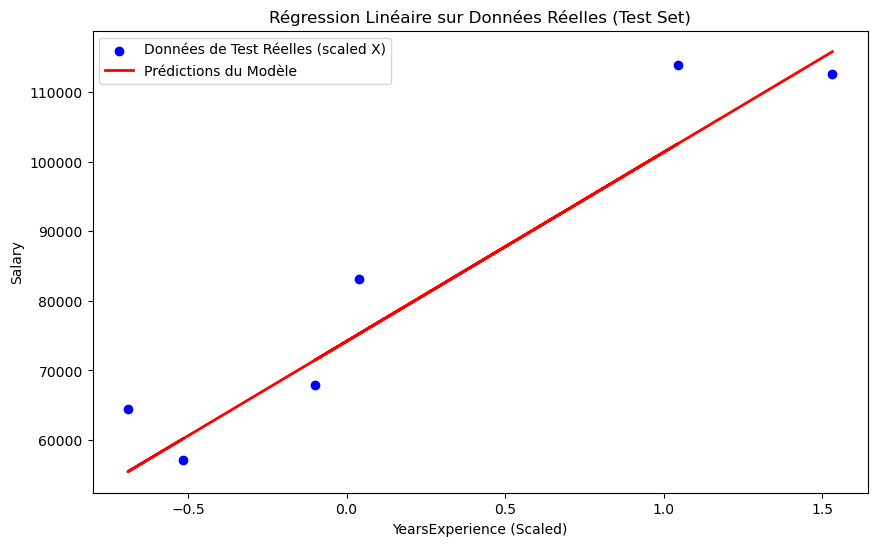

In [296]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test, color='blue', label='Données de Test Réelles (scaled X)')
plt.plot(X_test_scaled, y_pred_real_test_scaled, color='red', linewidth=2, label='Prédictions du Modèle')
plt.title('Régression Linéaire sur Données Réelles (Test Set)')
plt.xlabel('YearsExperience (Scaled)')
plt.ylabel('Salary')
plt.legend()
plt.show()

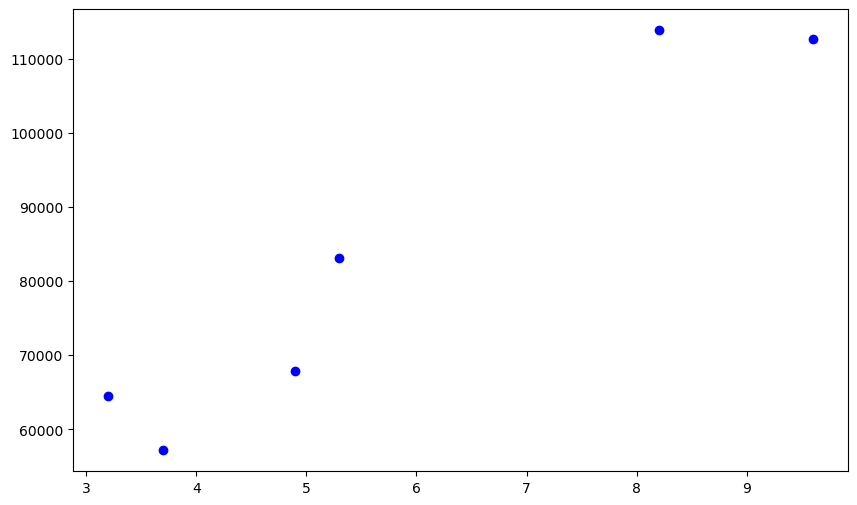

In [297]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Données de Test Réelles')

In [298]:
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_pred_for_plot_sorted = model_real_data.predict(scaler_X.transform(X_test_sorted))

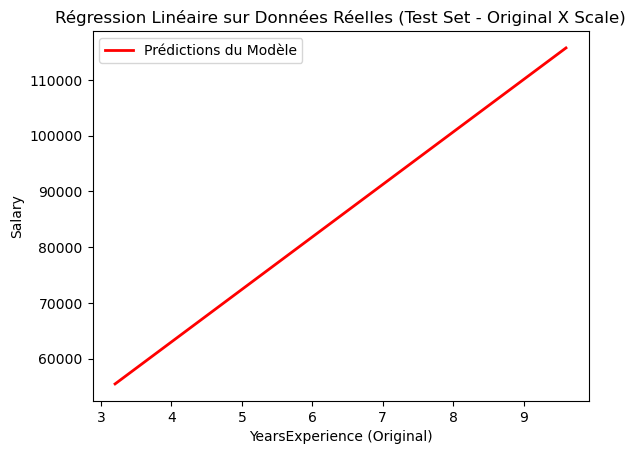

In [299]:
plt.plot(X_test_sorted, y_pred_for_plot_sorted, color='red', linewidth=2, label='Prédictions du Modèle')
plt.title('Régression Linéaire sur Données Réelles (Test Set - Original X Scale)')
plt.xlabel('YearsExperience (Original)')
plt.ylabel('Salary')
plt.legend()
plt.show()